In [2]:
import numpy as np
import pandas as pd
from io import StringIO 
import graphviz 
import pydotplus
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
from sklearn.tree import export_text
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
df = pd.read_csv('./content/winequality.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

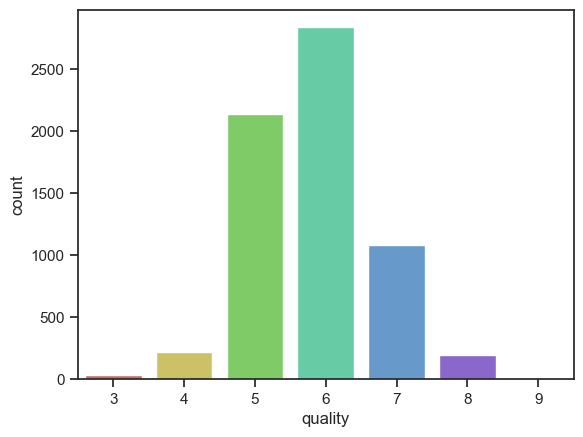

In [6]:
sns.countplot(x='quality', data=df, palette='hls')
plt.show()

In [7]:
le = LabelEncoder()
df['color']= le.fit_transform(df['color'])

# разделение на объекты-признаки и целевой признак
X = pd.DataFrame(df.iloc[:, df.columns != 'quality'].values, columns=[column for column in df.columns if column!='quality'])
y = pd.DataFrame(df.iloc[:, df.columns == 'quality'].values, columns=['quality'])
# X = df.iloc[:, df.columns != 'quality'].values
# y = df.iloc[:, df.columns == 'quality'].values

# кодирование категориальных данных из строк в числа
# cleanup_nums={"color":{'white':0, 'red':1}}
# X = X.replace(cleanup_nums)


In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.0,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.0,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.0,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1.0,1.0


In [9]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [10]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train.values.ravel())
# logreg.fit(X_train, y_train)
y_pred_test_logreg = logreg.predict(X_test)
y_pred_train_logreg = logreg.predict(X_train)
ac1 = accuracy_score(y_train, y_pred_train_logreg), accuracy_score(y_test, y_pred_test_logreg)
ac1

(0.7054069655570522, 0.6892307692307692)

In [12]:
u_=y['quality'].unique()
u_.sort()

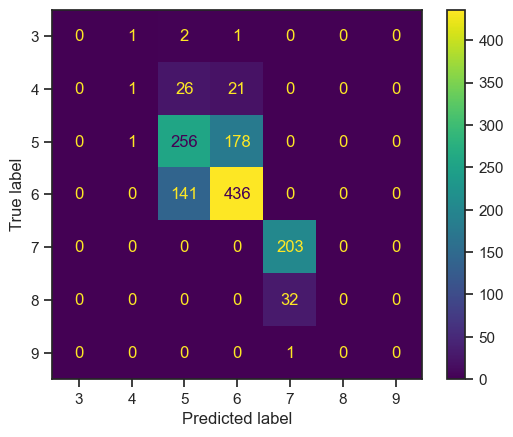

In [13]:
cm1 = confusion_matrix(y_test, y_pred_test_logreg, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=u_)
disp.plot()

In [14]:
svc = SVC(kernel='rbf') # (0.4365980373292284, 0.44153846153846155)
# svc = SVC(kernel='sigmoid') # (0.3265345391572061, 0.34923076923076923)
# svc = SVC(kernel='poly') # (0.4394843178756975, 0.4423076923076923)
svc.fit(X_train, y_train.values.ravel())
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
ac2 = accuracy_score(y_train.values.ravel(), y_pred_train_svc), accuracy_score(y_test.values.ravel(), y_pred_test_svc)
ac2

(0.4365980373292284, 0.44153846153846155)

In [1]:
# param_grid = {'degree': [1], 'kernel':['poly']}
# grid = GridSearchCV(SVC(), param_grid, verbose=2, scoring='accuracy')
# grid.fit(X_train, y_train.values.ravel())
# grid.best_params_

In [107]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x = x.reshape(-1, 1)
    y = y
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X, y.values.ravel())
    fig, ax = plt.subplots(figsize=(5,5))
    xx, yy = make_meshgrid(X.values.reshape(-1, 1), y.values.ravel())
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X, y, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()


In [18]:
svc = SVC(kernel='poly', degree=5)
svc.fit(X_train, y_train.values.ravel())
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
accuracy_score(y_train.values.ravel(), y_pred_train_svc), accuracy_score(y_test.values.ravel(), y_pred_test_svc)

(0.46392149316913606, 0.46384615384615385)

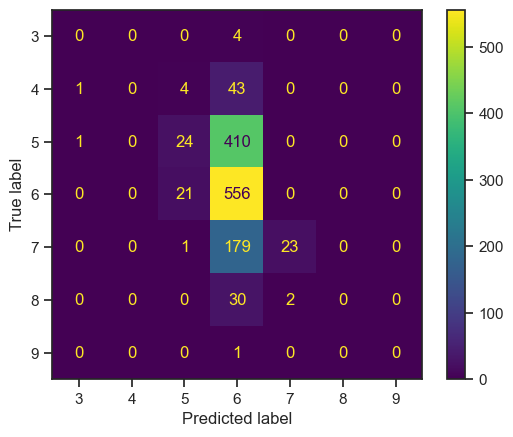

In [46]:
cm2 = confusion_matrix(y_test, y_pred_test_svc, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=u_)
disp.plot()

In [48]:
tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred_test_tree = tree.predict(X_test)
y_pred_train_tree = tree.predict(X_train)
ac3 = accuracy_score(y_train, y_pred_train_tree), accuracy_score(y_test, y_pred_test_tree)
ac3

(1.0, 0.7007692307692308)

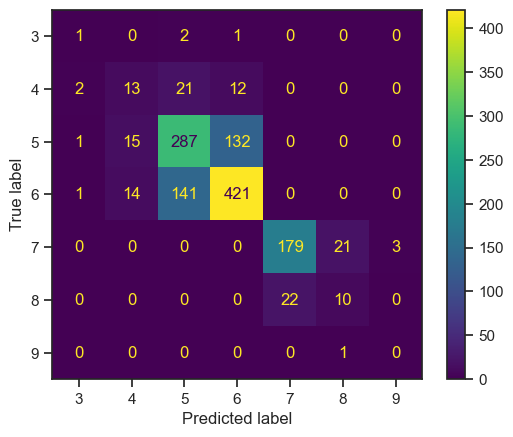

In [50]:
cm3 = confusion_matrix(y_test, y_pred_test_tree, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=u_)
disp.plot()

In [51]:
# сравнение качества моделей по 2 метрикам
print('LogisticRegression:     ', ac1)
print('SVC:                    ', ac2)
print('DecisionTreeClassifier: ', ac3)

LogisticRegression:      (0.7054069655570522, 0.6892307692307692)
SVC:                     (0.4394843178756975, 0.4423076923076923)
DecisionTreeClassifier:  (1.0, 0.7007692307692308)


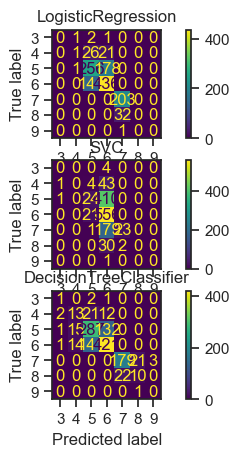

In [54]:
fig, ax = plt.subplots(3,1)
ax[0].set_title("LogisticRegression")
ax[1].set_title("SVC")
ax[2].set_title("DecisionTreeClassifier")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=u_).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=u_).plot(ax=ax[1])

ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=u_).plot(ax=ax[2])

In [71]:
tree_rules = export_text(tree, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [63]:
import os
os.environ["PATH"] += os.pathsep + 'H:/Tools/graphviz-8.0.1/Graphviz/bin'

In [70]:
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns, 
                           class_names=[str(u) for u in u_], 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [66]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

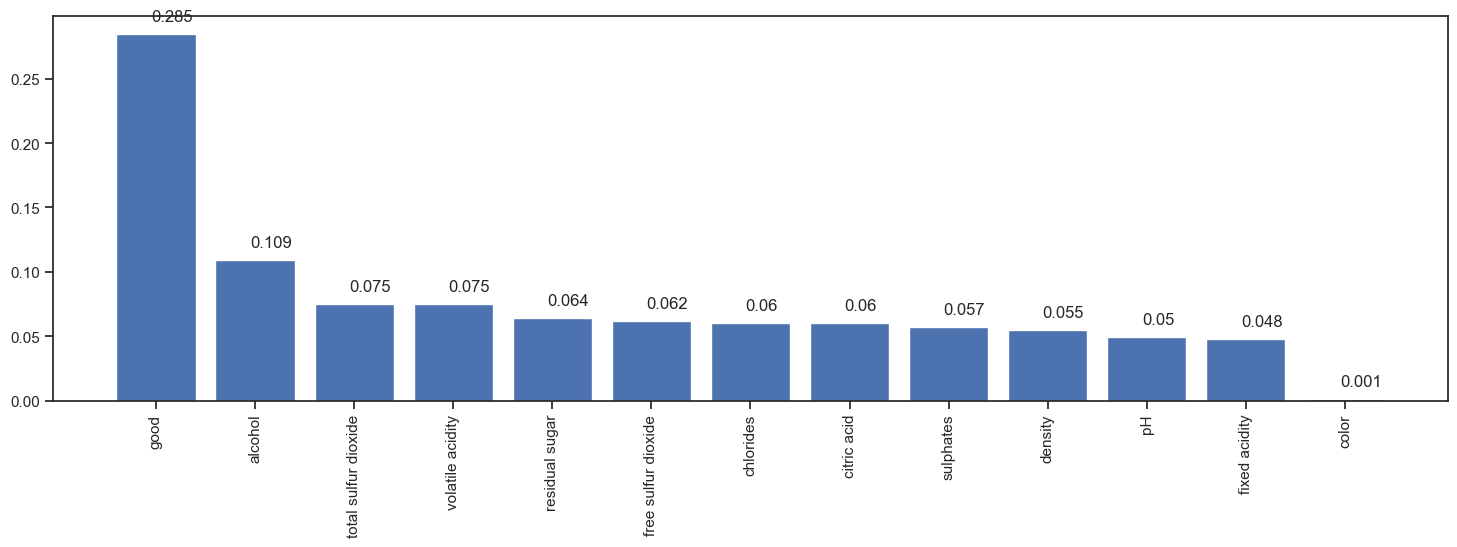

In [69]:
fl, fd = draw_feature_importances(tree,X)